## Observations and Insights

Overall, the sample mouses tested during the experiments have a positive proportion of the tumor volume to the weight. Sexs of the total sample mouses are almost half each, thus assuming samples were randomly selected and are under normal distribution.  

Four of the drug regimen tests were further analyzed during the data analysis, which are the most predictable treatment results due to their lowest SEM, they are are Ramicane, Capomuin, Infubinol and Ceftamin.

Based on the box plots created, Ramicane and Capomulin drug regimens should have better treatment efficiencies, as they result in lower final tumor volumes. 


## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

complete_data = pd.merge(mouse_metadata, study_results, how ='inner', on = "Mouse ID")
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = complete_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median = complete_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance = complete_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std = complete_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem = complete_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_stats = {'Mean': mean,
                'Median': median,
                'Variance': variance,
                'Standard Deviation': std,
                'SEM': sem}
summary_table = pd.DataFrame(data = summary_stats)
summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

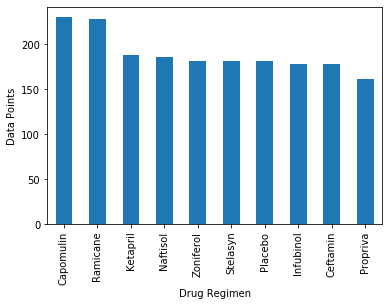

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# I assume number of ata points refers to number of each drug regimen?
counts_regimen = complete_data['Drug Regimen'].value_counts()
counts_regimen.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

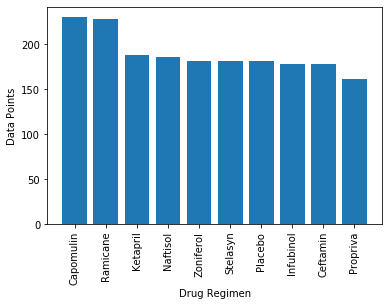

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(counts_regimen.index.values,counts_regimen.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

## Pie plots

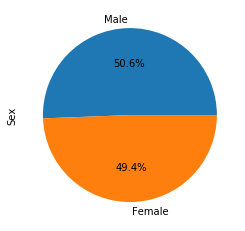

In [5]:
# Why plt.show() - we are using pandas
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_sex = complete_data["Sex"].value_counts()
count_sex.plot.pie(autopct='%1.1f%%')
plt.show()

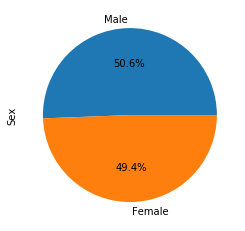

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(count_sex, labels = count_sex.index.values, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

final_time = complete_data.groupby(['Mouse ID']).max()[["Timepoint"]]
final_tumorvol= pd.merge(final_time, complete_data, on = ['Mouse ID', 'Timepoint'])
final_tumorvol

sem_sort=summary_table.sort_values('SEM')
sem_sort

ramicane = final_tumorvol.loc[final_tumorvol["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
capomulin = final_tumorvol.loc[final_tumorvol["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ceftamin = final_tumorvol.loc[final_tumorvol["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
infubinol = final_tumorvol.loc[final_tumorvol["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
ramicane.head()


6     38.407618
7     43.047543
10    38.810366
12    32.978522
33    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Calculate the IQR
quartiles_ramicane = ramicane.quantile([.25,.5,.75])
quartiles_capomulin = capomulin.quantile([.25,.5,.75])
quartiles_infubinol = infubinol.quantile([.25,.5,.75])
quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])

# IQR rule for outliers 
lower_ramicane = quartiles_ramicane[0.25] - 1.5*(quartiles_ramicane[0.75] - quartiles_ramicane[0.25])
upper_ramicane = quartiles_ramicane[0.75] + 1.5*(quartiles_ramicane[0.75] - quartiles_ramicane[0.25])

lower_capomulin = quartiles_capomulin[0.25] - 1.5*(quartiles_capomulin[0.75] - quartiles_capomulin[0.25])
upper_capomulin = quartiles_capomulin[0.75] + 1.5*(quartiles_capomulin[0.75] - quartiles_capomulin[0.25])

lower_infubinol = quartiles_infubinol[0.25] - 1.5*(quartiles_infubinol[0.75] - quartiles_infubinol[0.25])
upper_infubinol = quartiles_infubinol[0.75] + 1.5*(quartiles_infubinol[0.75] - quartiles_infubinol[0.25])

lower_ceftamin = quartiles_ceftamin[0.25] - 1.5*(quartiles_ceftamin[0.75] - quartiles_ceftamin[0.25])
upper_ceftamin = quartiles_ceftamin[0.75] + 1.5*(quartiles_ceftamin[0.75] - quartiles_ceftamin[0.25])

# Quantitatively determine if there are any potential outliers
ramicane_lower_outliers = ramicane.loc[ramicane < lower_ramicane]
ramicane_upper_outliers = ramicane.loc[ramicane > upper_ramicane]
ramicane_upper_outliers

#ramicane outliers
ramicane_outliers = ramicane.loc[(ramicane < lower_ramicane)|(ramicane > upper_ramicane)]
ramicane_outliers 

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [9]:
#capomulin outliers
capomulin_outliers = capomulin.loc[(capomulin < lower_capomulin) | (capomulin > upper_capomulin)]
capomulin_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [10]:
#infubinol outliers
infubinol_outliers = infubinol.loc[(infubinol < lower_infubinol) | (infubinol > upper_infubinol)]
infubinol_outliers

31    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#ceftamin outliers
ceftamin_outliers = ceftamin.loc[(ceftamin < lower_infubinol) | (ceftamin > upper_infubinol)]
ceftamin_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

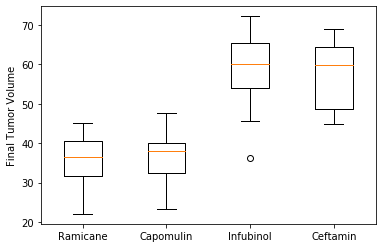

In [156]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([ramicane, capomulin, infubinol, ceftamin], labels = ['Ramicane','Capomulin','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume')
plt.show()

# Line and scatter plots

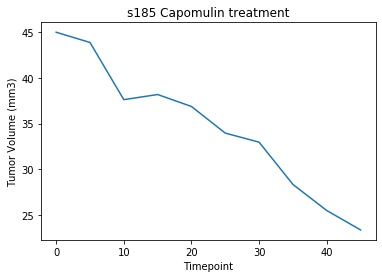

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# assume any mouse treate dwith Capomulin
capomulin_data = complete_data.loc[complete_data['Drug Regimen'] == "Capomulin"]
#pick Mouse ID s185
s185_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']
plt.plot(s185_data['Timepoint'],s185_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('s185 Capomulin treatment')
plt.show()

Text(0.5, 1.0, 'weight vs average tumor volume, Capomulin regimen')

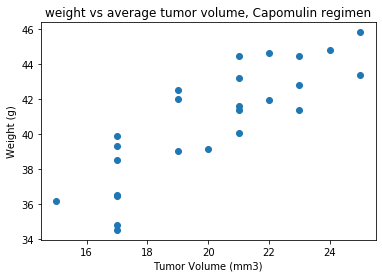

In [105]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight_tumor_data = capomulin_data[['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
capomulin_weight = capomulin_weight_data.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)']]
capomulin_tumorvol = capomulin_weight_data.groupby(['Mouse ID']).mean()[['Weight (g)']]
capomulin_scatter_data = pd.merge(capomulin_weight,capomulin_tumorvol, on=['Mouse ID'])

plt.scatter(capomulin_scatter_data['Weight (g)'],capomulin_scatter_data['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('weight vs average tumor volume, Capomulin regimen')

In [114]:
# Calculate the correlation coefficient
capomulin_scatter_data.corr()
#or use scipy.stats
corr = round(st.pearsonr(capomulin_scatter_data['Weight (g)'],capomulin_scatter_data['Tumor Volume (mm3)'])[0],2)
corr

0.84

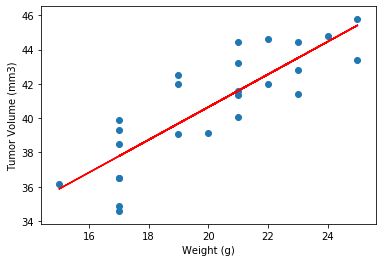

In [155]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
linear_regression_model = st.linregress(capomulin_scatter_data['Weight (g)'],capomulin_scatter_data['Tumor Volume (mm3)'])
linear_regression_model
#now know the slope and intercept
y_values = linear_regression_model[0]*capomulin_scatter_data['Weight (g)']+linear_regression_model[1]
y_values
plt.plot(capomulin_scatter_data['Weight (g)'],y_values,color="red")
plt.scatter(capomulin_scatter_data['Weight (g)'],capomulin_scatter_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()